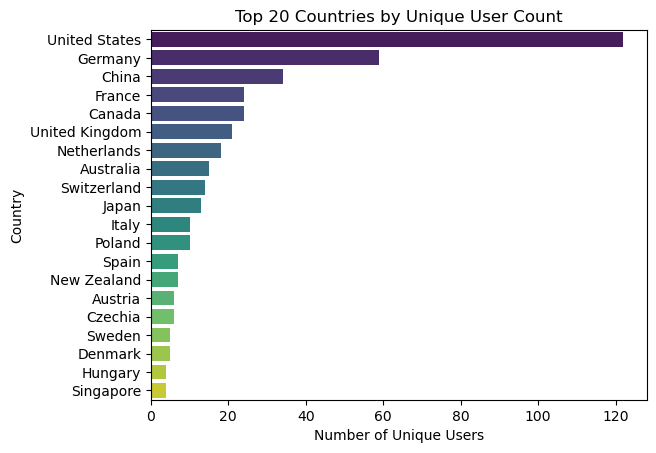

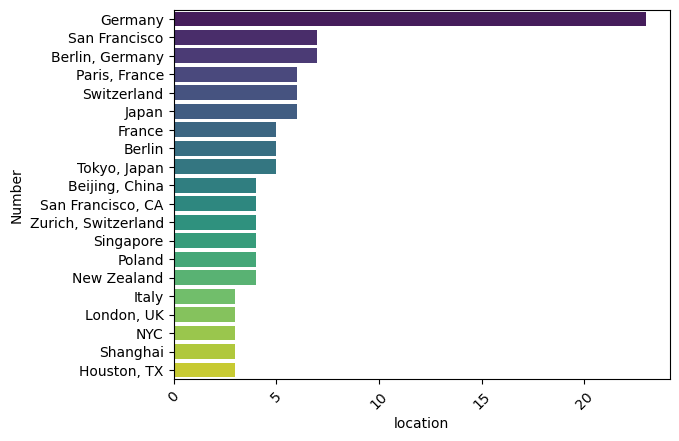

In [16]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

path='users_combined_info_500.csv'
df=pd.read_csv(path)

#统计每个国家和地区的用户数量

df_cleaned = df.dropna(subset=['name', 'country'])

# 去除重复的用户记录（保留每条 name 记录的第一个出现）
df_unique_users = df_cleaned.drop_duplicates(subset='name', keep='first')

country_distribution = df_unique_users['country'].value_counts().reset_index()
country_distribution.columns = ['country', 'user_count']

sns.barplot(data=country_distribution.head(20), x='user_count', y='country', palette='viridis')

# 添加标题和标签
plt.title('Top 20 Countries by Unique User Count')
plt.xlabel('Number of Unique Users')
plt.ylabel('Country')
plt.show()

# 城市级别分布

df_cleaned1 = df.dropna(subset=['name', 'location'])

# 去除重复的用户记录（保留每条 name 记录的第一个出现）
df_unique_users = df_cleaned.drop_duplicates(subset='name', keep='first')

location_distribution = df_unique_users['location'].value_counts().reset_index()
location_distribution.columns = ['location', 'user_count']

sns.barplot(data=location_distribution.head(20), x='user_count', y='location', palette='viridis')
plt.xlabel('location')
plt.ylabel('Number')
plt.xticks(rotation=45)
plt.show()



timezone_readable
UTC+08:00    1294776
Name: count, dtype: int64


(array([0]), [Text(0, 0, 'UTC+08:00')])

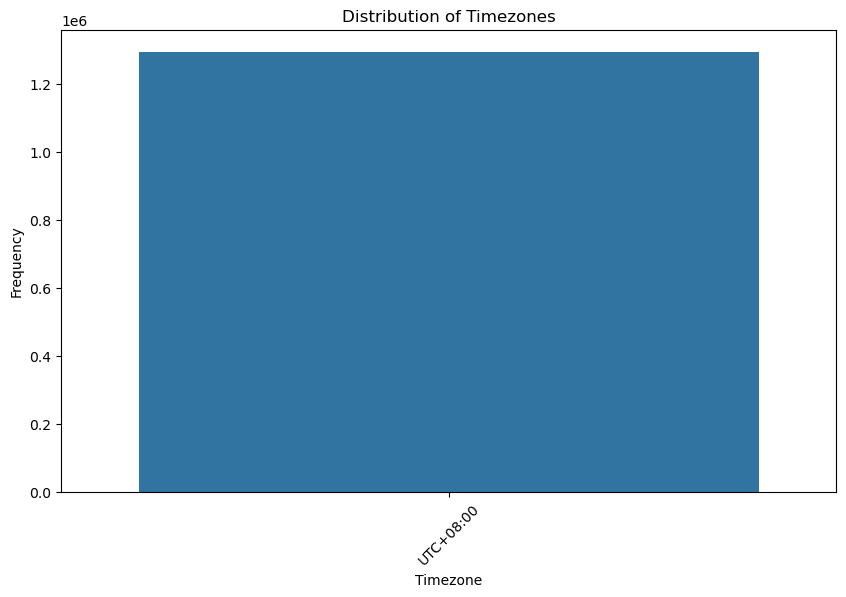

In [15]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

path='users_combined_info_500.csv'
df=pd.read_csv(path)

df['event_time']=pd.to_datetime(df['event_time'])
df['timezone']=df['event_time'].dt.strftime('%z')
df['timezone_readable']=df['timezone'].apply(lambda x: f"UTC{x[:-2]}:{x[-2:]}" if pd.notnull(x) else 'Unknown')

timezone=df['timezone_readable'].value_counts()
print(timezone)
# 时区都是 + 08:00
plt.figure(figsize=(10, 6))
sns.barplot(x=timezone.index, y=timezone.values)
plt.title('Distribution of Timezones')
plt.xlabel('Timezone')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
#plt.show()


                   name  submission_count activity_level
111             arlac77             37960           high
57           MilosKozak             36400           high
166           danielroe             30616           high
151          chenrui333             20300           high
16   ConfluentSemaphore             19215           high
437             taiki-e             14505           high
285               khipp             12905           high
129           bot-targa             12704           high
215              frenck             11218           high
121              bdraco             10764           high
50       LinuxServer-CI              9137           high
112              arsenm              8534           high
26         Exorcism0666              8401           high
65          PX4BuildBot              8346           high
322             mattsse              6599           high
80      SuperSandro2000              6249           high
267            joostlek        

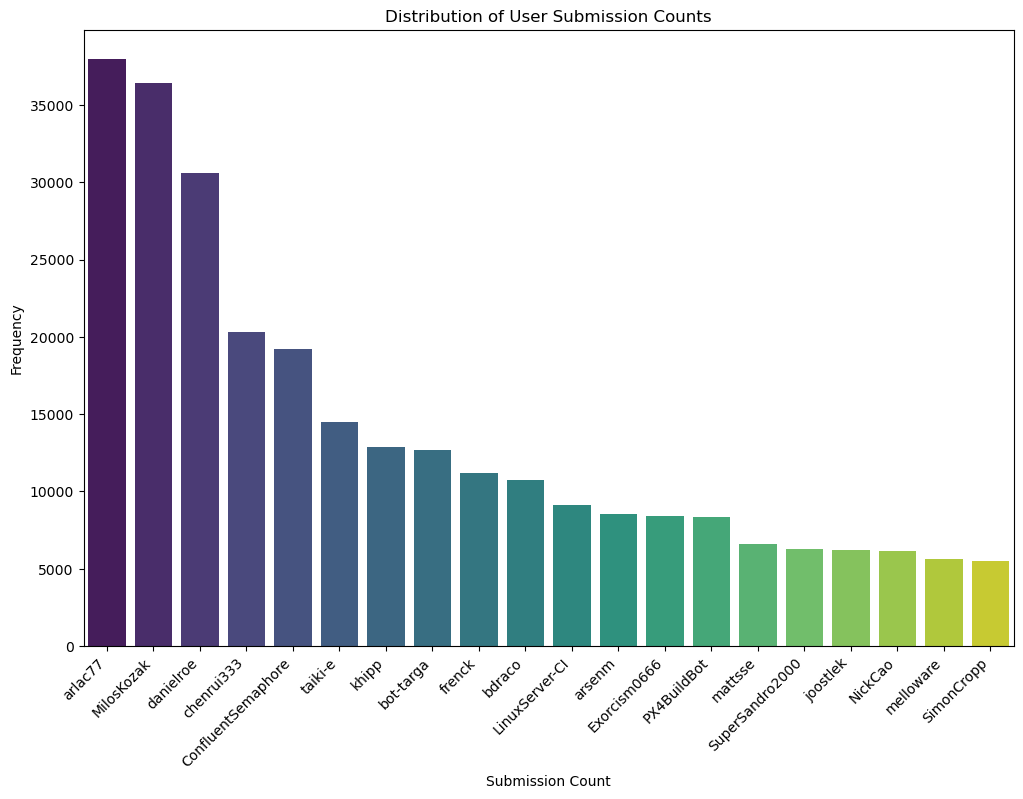

In [4]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

path='users_combined_info_500.csv'
df=pd.read_csv(path)

# 统计每个用户的提交次数
user_activity = df.groupby('name').size().reset_index(name='submission_count')
# 定义高活跃用户和低活跃用户的阈值
high_activity_threshold = user_activity['submission_count'].quantile(0.9)
low_activity_threshold = user_activity['submission_count'].quantile(0.1)

# 对于用户提交次数标记活跃用户，中等用户，低活跃用户
user_activity['activity_level'] = 'medium'
user_activity.loc[user_activity['submission_count'] > high_activity_threshold, 'activity_level'] = 'high'
user_activity.loc[user_activity['submission_count'] < low_activity_threshold, 'activity_level'] = 'low'

# 按提交次数降序排序并选择前 20 名用户
N = 20
user_activity_sorted = user_activity.sort_values(by='submission_count', ascending=False).head(N)
print(user_activity_sorted)


# 可视化提交频率
plt.figure(figsize=(12, 8))
sns.barplot(data=user_activity_sorted, x='name', y='submission_count', palette='viridis')
plt.title('Distribution of User Submission Counts')
plt.xlabel('Submission Count')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.show()


Event distribution:
                        event_type event_action   count
0              CommitCommentEvent        added     704
1                     CreateEvent        added  104371
2                     DeleteEvent        added   96999
3                       ForkEvent        added    2175
4                     GollumEvent        added     683
5               IssueCommentEvent      created  174806
6                     IssuesEvent       closed   39326
7                     IssuesEvent       opened   10637
8                     IssuesEvent     reopened    1242
9                     MemberEvent        added     390
10                    PublicEvent        added      55
11               PullRequestEvent       closed  134163
12               PullRequestEvent       opened   65769
13               PullRequestEvent     reopened    1196
14  PullRequestReviewCommentEvent        added     886
15  PullRequestReviewCommentEvent      created   85312
16         PullRequestReviewEvent      creat

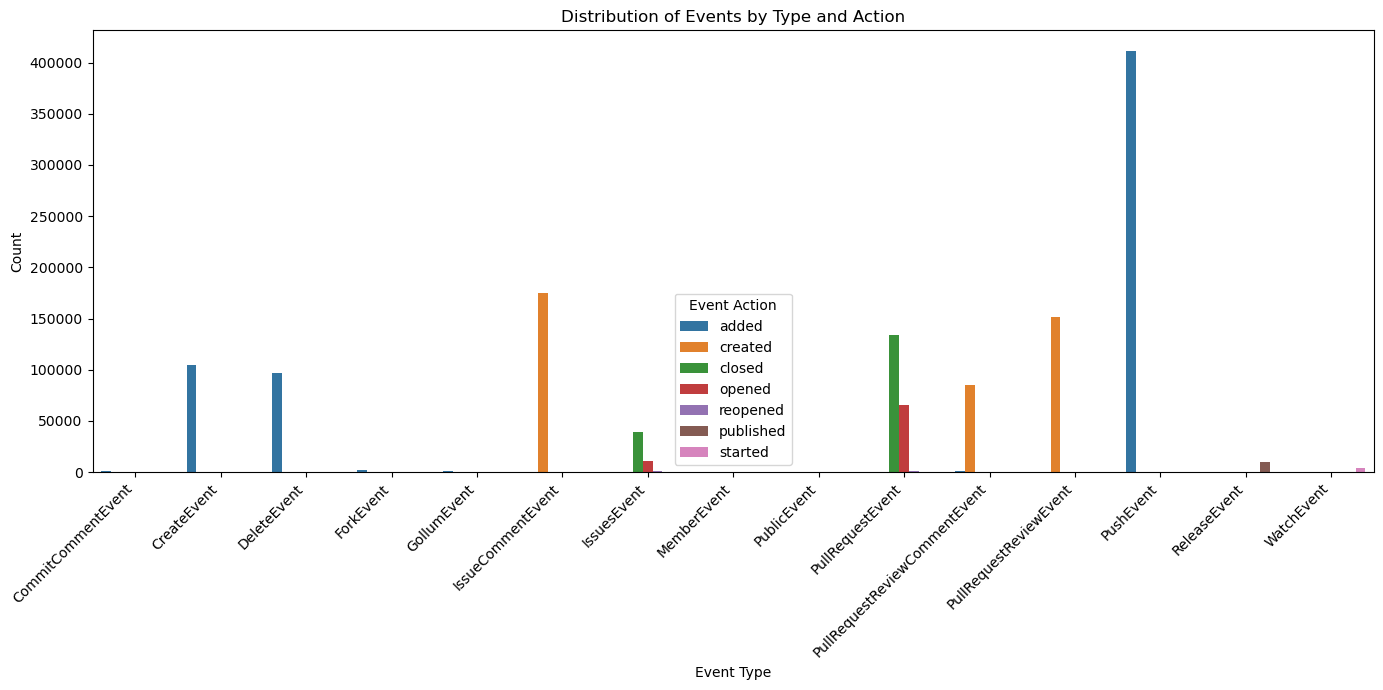

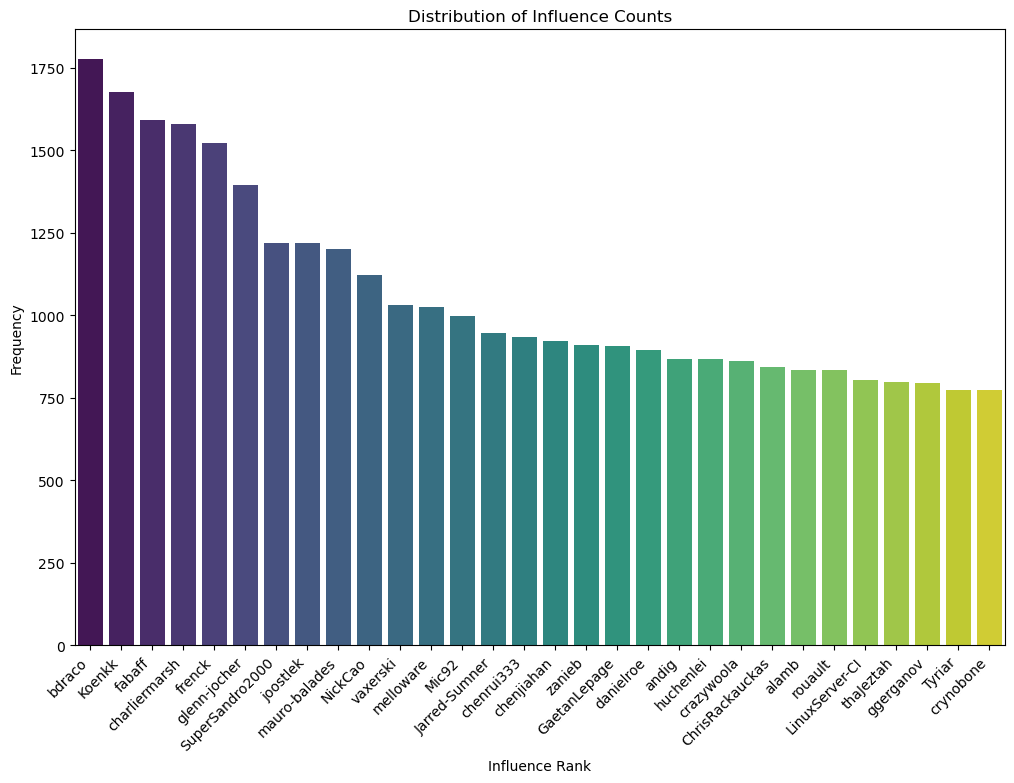

In [ ]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

path='users_combined_info_500.csv'
df=pd.read_csv(path)

# 其他维度的洞察
#1. event_type 下 各个 event_action 的活动
#  event_type 对事件类型的排序，分类用户的行为，理解总活动中主要的活动类别。
#  event_action 描述 在这个事件类型下具体发生了什么。
# 将 event_type 和 event_action 联合，清楚有效地表示出各个 事件类型的action
event_distribution = df.groupby(['event_type', 'event_action']).size().reset_index(name='count')

print("Event distribution:\n", event_distribution)

plt.figure(figsize=(14, 7))
sns.barplot(data=event_distribution, x='event_type', y='count', hue='event_action')
plt.title('Distribution of Events by Type and Action')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.legend(title='Event Action')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()


# 2.统计用户的影响力 total_influence 进行排序

user_influence = df[['name', 'total_influence']].drop_duplicates(subset=['name'], keep='first')

# 按提交次数降序排序并选择前 30 名用户
N = 30
user_influence_sorted = user_influence.sort_values(by='total_influence', ascending=False).head(N)

plt.figure(figsize=(12, 8))
sns.barplot(data=user_influence_sorted, x='name', y='total_influence', palette='viridis')
plt.title('Distribution of Influence Counts')
plt.xlabel('Influence Rank')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.show()